In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import scipy 
from tqdm.notebook import tqdm
from scipy.stats import zscore
import matplotlib
import seaborn as sns
from nilearn.connectome import ConnectivityMeasure
sns.set()
sns.set_context("talk", font_scale = 1.5)
sns.set_style('whitegrid')
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['axes.axisbelow'] = True
#matplotlib.rcParams.update({'figure.autolayout': True})
matplotlib.rcParams['figure.figsize'] = [10, 7]

In [2]:
def euler_char(A,thresh):
    ECs = []
    A = A - np.identity(np.shape(A)[0])
    
    for t in thresh:

        M = np.array((A <= t)*1)
                
        #Number Edges
        Edges = np.sum(M)/2
        
        #Number Vertices
        Vertices = np.shape(A)[0]
        
        #Betti 1
        EC = Vertices - Edges
        
        ECs.append(EC)
        
    return ECs

In [3]:
with open('Sampled_train.pickle', 'rb') as handle:

    Sampled_train = pickle.load(handle)

In [11]:
MeanECs = []

corrmats = []

for j in tqdm(range(20)):

    baseline = Sampled_train[Sampled_train["faultNumber"] == j]
    
    ECs = []
    
    for i in range(20):
        baseline1 = baseline[baseline["simulationRun"]==i+1]
        baseline1 = baseline1.iloc[:,3::]
        precis_measure = ConnectivityMeasure(kind="precision", vectorize = False)
        corr_mat_all = precis_measure.fit_transform([np.asarray(baseline1)])
        corrmats.append(corr_mat_all)
        thresh = np.arange(0,1,.001)
        EC = euler_char(corr_mat_all[0,:,:],thresh)
        ECs.append(EC)

    ECz = np.stack(ECs).T

    MeanEC = np.mean(ECz,axis = 1)
    
    MeanECs.append(MeanEC)

  0%|          | 0/20 [00:00<?, ?it/s]

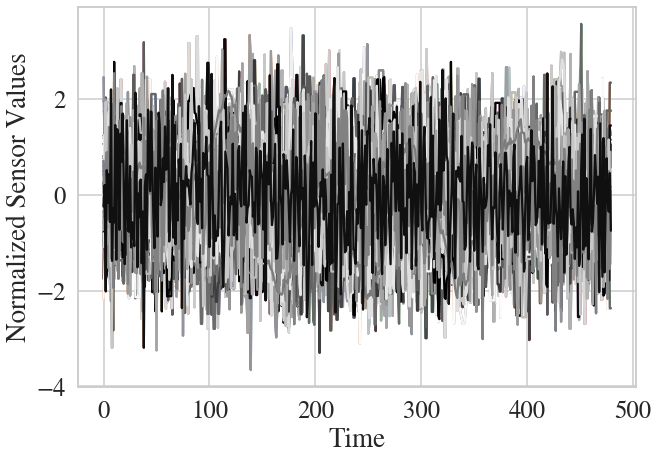

In [5]:
plt.plot(zscore(baseline1))
plt.xlabel("Time")
plt.ylabel("Normalized Sensor Values")

colors = np.random.rand(52)

time_series = np.asarray(baseline1)

for i in range(52):
    plt.plot(zscore(time_series[:,i]),c = str(colors[i]))

plt.savefig("teneastts.pdf",transparent = True)

In [12]:
np.shape(corrmats)

(400, 1, 52, 52)

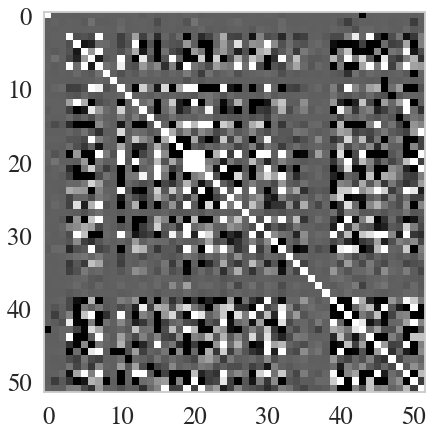

In [26]:
plt.imshow(corrmats[1][0,:,:],cmap = "gray",vmin = -0.03,vmax = .05)
plt.grid(False)
plt.xticks([0,10,20,30,40,50])

plt.savefig("corrmat0.pdf",transparent = True)

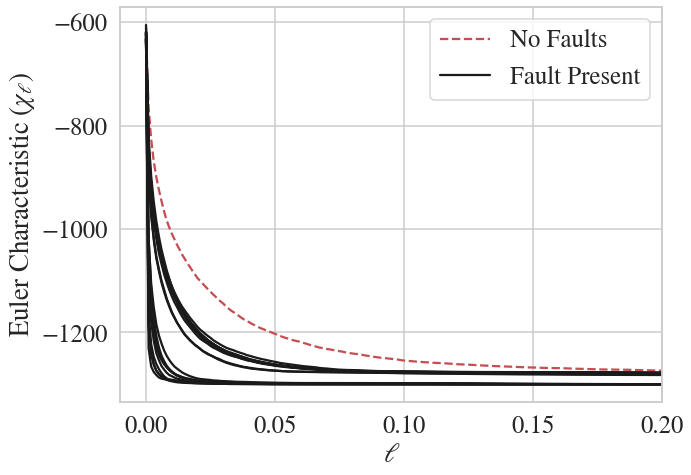

In [8]:
plt.plot(thresh,MeanECs[0],'--r',label ="No Faults")


for i in range(19):
    if i == 0:
        plt.plot(thresh,MeanECs[i+1],c = 'k',label = "Fault Present")
    
    else:
        plt.plot(thresh,MeanECs[i+1],c = 'k')
        
        
plt.xlim(-0.01,.2)
plt.legend()

plt.xlabel("$\ell$")

plt.ylabel(r"Euler Characteristic ($\chi_{\ell}$)")

plt.tight_layout()

plt.savefig("eastec.pdf",transparent = True)